# Imports

In [1]:
from binance import Client
import pandas as pd
import numpy as np
import os
from datetime import datetime
import mplfinance as mpf

# Settings

In [2]:
symbol         = "BTCUSDT"
interval       = Client.KLINE_INTERVAL_4HOUR
start          = datetime(2020, 1, 1)
end            = datetime(2020, 1, 5)
binance_key    = "xxxxxxxxxx"
binance_secret = "xxxxxxxxxx"

# Load Data

In [3]:
start = start.strftime("%d%b%-y")
end = end.strftime("%d%b%-y")
filename = "{}_{}_{}-{}".format(symbol, str(interval), start, end)
client = Client(binance_key, binance_secret)

In [4]:
klines = client.get_historical_klines(symbol, interval, start, end)
data = np.array(klines)
df = pd.DataFrame({
    'time': pd.to_datetime(data[:, 0], unit='ms'),
    'open': pd.to_numeric(data[:, 1]),
    'high': pd.to_numeric(data[:, 2]),
    'low': pd.to_numeric(data[:, 3]),
    'close': pd.to_numeric(data[:, 4]),
    'volume': pd.to_numeric(data[:, 5]),
    'close_time': pd.to_datetime(data[:, 6], unit='ms'),
    'quote_asset_volume': pd.to_numeric(data[:, 7]),
    'number_trades': pd.to_numeric(data[:, 8]),
    'taker_buy_base_asset_volume': pd.to_numeric(data[:, 9]),
    'taker_buy_quote_asset_volume': pd.to_numeric(data[:, 10])
})
df = df.set_index("time")
if not os.path.exists("./data/klines/{}".format(symbol)):
    os.mkdir("./data/klines/{}".format(symbol))
df.to_pickle("./data/klines/{}/{}.pkl".format(symbol, filename))
display(df.head(5))

,open,high,low,close,volume,close_time,quote_asset_volume,number_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
time,,,,,,,,,,
2020-01-01 00:00:00,7195.24,7245.00,7175.46,7225.01,2833.749180,2020-01-01 03:59:59.999,2.044590e+07,32476,1548.865619,1.117659e+07
2020-01-01 04:00:00,7225.00,7236.27,7199.11,7209.83,2061.295051,2020-01-01 07:59:59.999,1.489018e+07,29991,1049.711236,7.582850e+06
2020-01-01 08:00:00,7209.83,7237.73,7180.00,7197.20,3166.654361,2020-01-01 11:59:59.999,2.280732e+07,33507,1562.344314,1.125370e+07
2020-01-01 12:00:00,7197.20,7255.00,7196.15,7234.19,3492.537459,2020-01-01 15:59:59.999,2.523556e+07,36549,2086.279119,1.507671e+07
2020-01-01 16:00:00,7234.20,7249.99,7214.00,7229.48,2980.583291,2020-01-01 19:59:59.999,2.156177e+07,32877,1673.060594,1.210416e+07


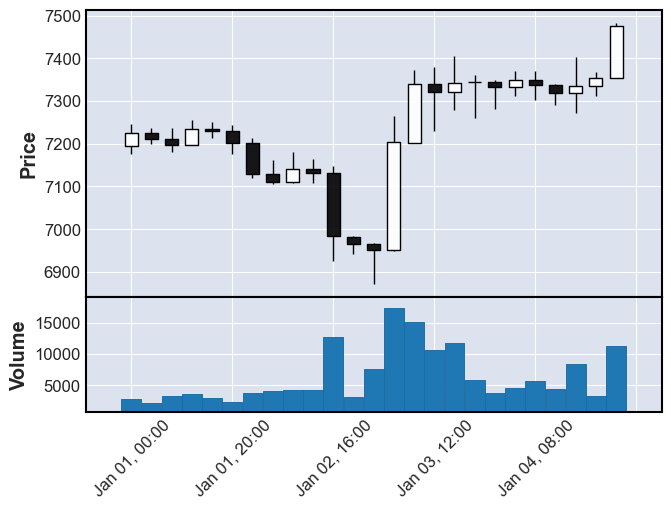

In [5]:
mpf.plot(df,type='candle',volume=True)